Analyse des sentiements sur Twitter

Chargement des données 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import chardet

with open("data.csv", "rb") as file:
    result = chardet.detect(file.read(100000))
    print(result)

df = pd.read_csv("data.csv", encoding="latin1",header=None)
print(df)
print(df.columns)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}
         0           1                             2         3  \
0        0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599995  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                       4                                                  5  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, 

In [3]:
df.columns = ["target", "ids", "date", "flag", "user", "text"]

# Afficher le DataFrame pour vérifier les nouveaux noms de colonnes
print(df)

         target         ids                          date      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww

Préparation et nettoyage des données 

In [38]:
import re

# Fonction pour nettoyer les tweets
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Supprimer les URLs
    text = re.sub(r'@\S+', '', text)  # Supprimer les mentions
    text = re.sub(r'#\S+', '', text)  # Supprimer les hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Supprimer la ponctuation
    text = text.lower()  # Mettre tout en minuscule
    return text

# Appliquer le nettoyage sur la colonne 'text'
df['cleaned_text'] = df['text'].apply(clean_text)

# Afficher quelques exemples après nettoyage
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",a thats a bummer you shoulda got david car...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


In [39]:
# Vérifier les valeurs manquantes dans chaque colonne
missing_values = df.isna().sum()

# Afficher les résultats
print(missing_values)


target          0
ids             0
date            0
flag            0
user            0
text            0
cleaned_text    0
dtype: int64


In [40]:
# Conversion de la colonne 'date' en datetime avec gestion des fuseaux horaires
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Vérifier les premières lignes pour voir si la conversion a fonctionné
print(df.head())


   target         ids                      date      flag             user  \
0       0  1467810369 2009-04-06 22:19:45+00:00  NO_QUERY  _TheSpecialOne_   
1       0  1467810672 2009-04-06 22:19:49+00:00  NO_QUERY    scotthamilton   
2       0  1467810917 2009-04-06 22:19:53+00:00  NO_QUERY         mattycus   
3       0  1467811184 2009-04-06 22:19:57+00:00  NO_QUERY          ElleCTF   
4       0  1467811193 2009-04-06 22:19:57+00:00  NO_QUERY           Karoli   

                                                text  \
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1  is upset that he can't update his Facebook by ...   
2  @Kenichan I dived many times for the ball. Man...   
3    my whole body feels itchy and like its on fire    
4  @nationwideclass no, it's not behaving at all....   

                                        cleaned_text  
0     a thats a bummer  you shoulda got david car...  
1  is upset that he cant update his facebook by t...  
2   i dived many times for th

C:\Users\12208608\AppData\Local\Temp\ipykernel_5660\2680145894.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')


In [41]:
# Extraire la date sans l'heure ni le fuseau horaire
df['date_only'] = df['date'].dt.date

# Vérifier les premières lignes après modification
print(df[['date', 'date_only']].head())


                       date   date_only
0 2009-04-06 22:19:45+00:00  2009-04-06
1 2009-04-06 22:19:49+00:00  2009-04-06
2 2009-04-06 22:19:53+00:00  2009-04-06
3 2009-04-06 22:19:57+00:00  2009-04-06
4 2009-04-06 22:19:57+00:00  2009-04-06


In [42]:
# Extraire l'heure sans la date ni le fuseau horaire
df['time_only'] = df['date'].dt.strftime('%H:%M:%S')

# Vérifier les premières lignes après modification
print(df[['date', 'time_only']].head())


                       date time_only
0 2009-04-06 22:19:45+00:00  22:19:45
1 2009-04-06 22:19:49+00:00  22:19:49
2 2009-04-06 22:19:53+00:00  22:19:53
3 2009-04-06 22:19:57+00:00  22:19:57
4 2009-04-06 22:19:57+00:00  22:19:57


In [44]:

# Fonction pour catégoriser l'heure
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Matin'
    elif 12 <= hour < 14:
        return 'Midi'
    elif 14 <= hour < 18:
        return 'Après-midi'
    elif 18 <= hour < 24:
        return 'Soir'
    else:
        return 'Nuit'

# s'assure  que la colonne 'time_only' contient des valeurs sous forme de chaînes 'HH:MM:SS'
# Extraire l'heure sous forme d'entier à partir de la colonne 'time_only'
df['hour'] = pd.to_datetime(df['time_only'], format='%H:%M:%S').dt.hour

# Appliquer la fonction de catégorisation sur la colonne 'hour'
df['time_of_day'] = df['hour'].apply(categorize_time)

# Afficher la nouvelle colonne 'time_of_day'
print(df['time_of_day'])



0           Soir
1           Soir
2           Soir
3           Soir
4           Soir
           ...  
1599995    Matin
1599996    Matin
1599997    Matin
1599998    Matin
1599999    Matin
Name: time_of_day, Length: 1600000, dtype: object


Analyse et statistiques des données 

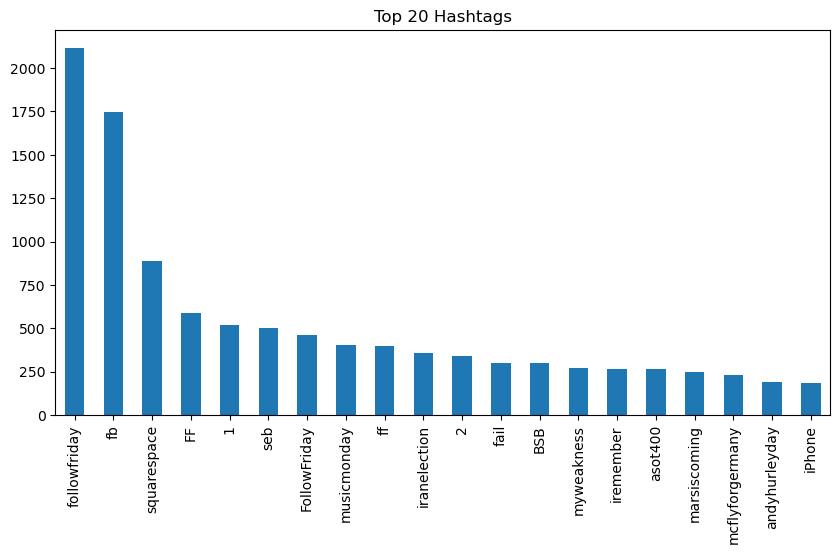

In [45]:
# Analyse des hashtags
import matplotlib.pyplot as plt 
df['hashtags'] = df['text'].apply(lambda x: re.findall(r'#(\w+)', x))
hashtag_counts = pd.Series([ht for sublist in df['hashtags'] for ht in sublist]).value_counts()[:20]
hashtag_counts.plot(kind='bar', figsize=(10, 5), title="Top 20 Hashtags")
plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12208608\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


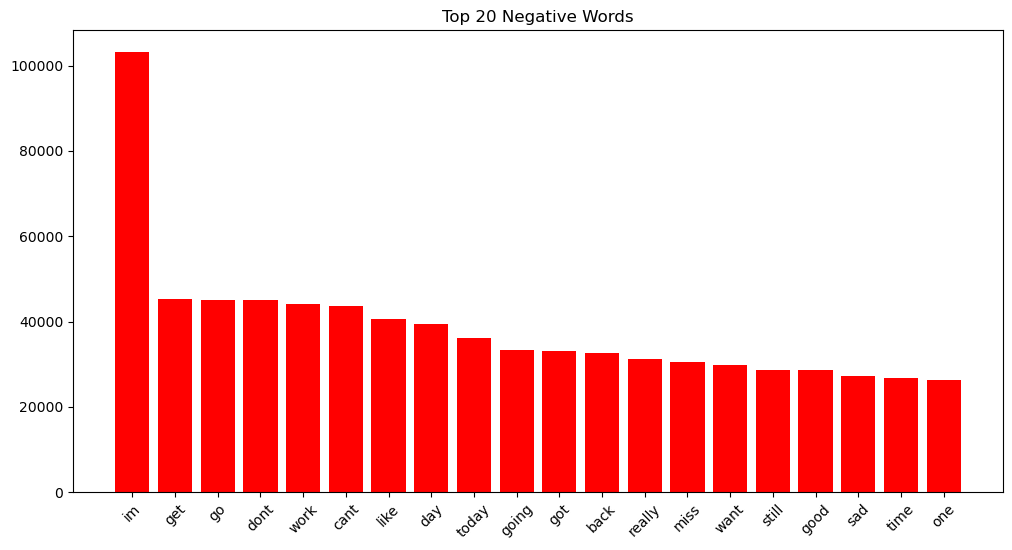

In [46]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Télécharger la liste des stop words si ce n'est pas déjà fait
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  

# Fonction pour filtrer les mots vides
def filter_stop_words(words):
    return [word for word in words if word not in stop_words]

# Mots les plus fréquents dans les tweets négatifs
negative_words = ' '.join(df[df['target'] == 0]['cleaned_text']).split()
negative_words_filtered = filter_stop_words(negative_words)
negative_word_counts = Counter(negative_words_filtered).most_common(20)

# Visualisation des mots les plus fréquents négatifs
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in negative_word_counts], [word[1] for word in negative_word_counts], color='red')
plt.title('Top 20 Negative Words')
plt.xticks(rotation=45)
plt.show()

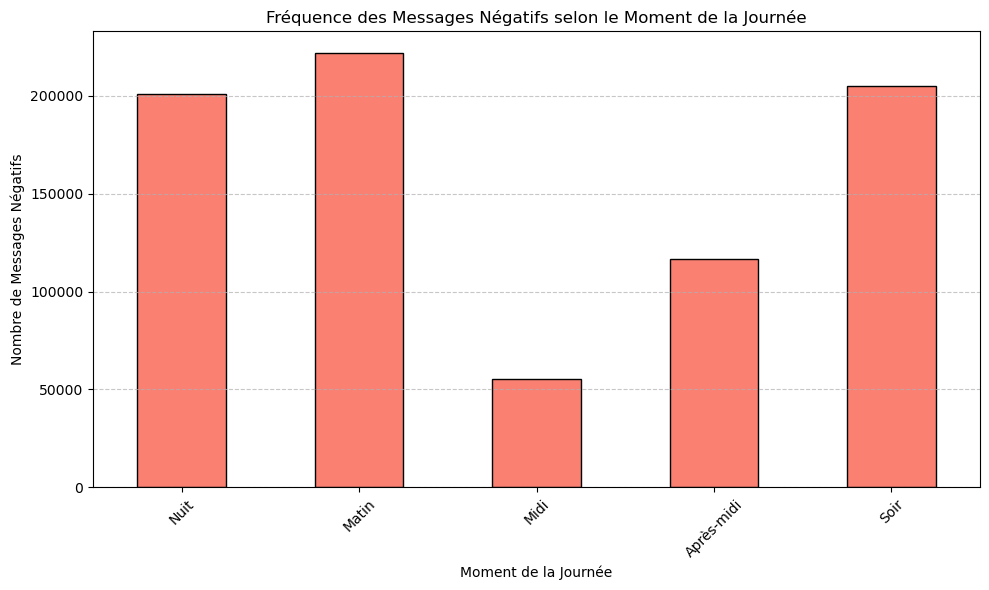

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrer les messages négatifs
negative_messages = df[df['target'] == 0]

# Compter les messages négatifs selon le moment de la journée
negative_counts_by_time = negative_messages['time_of_day'].value_counts().reindex(['Nuit', 'Matin', 'Midi', 'Après-midi', 'Soir'], fill_value=0)

# Tracer le graphique
plt.figure(figsize=(10, 6))
negative_counts_by_time.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Fréquence des Messages Négatifs selon le Moment de la Journée')
plt.xlabel('Moment de la Journée')
plt.ylabel('Nombre de Messages Négatifs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()

Entrainement et evaluation des modeles 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')

# Utilisation de TfidfVectorizer pour transformer les tweets en vecteurs
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])


# La colonne 'target' contient les labels, où 0 est négatif et 4 est positif
y = df['target'].apply(lambda x: 1 if x == 4 else 0)
print(X.shape, y.shape)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12208608\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(1600000, 5000) (1600000,)


In [49]:
from sklearn.model_selection import train_test_split

# Division des données (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la taille des ensembles
print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'entraînement : (1280000, 5000)
Taille de l'ensemble de test : (320000, 5000)


In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entraînement du modèle
model = MultinomialNB()
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.757675
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           1       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000



In [52]:
from sklearn.linear_model import LogisticRegression

# Entraînement du modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.772803125
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77    159494
           1       0.76      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

Confusion Matrix:
 [[119454  40040]
 [ 32663 127843]]


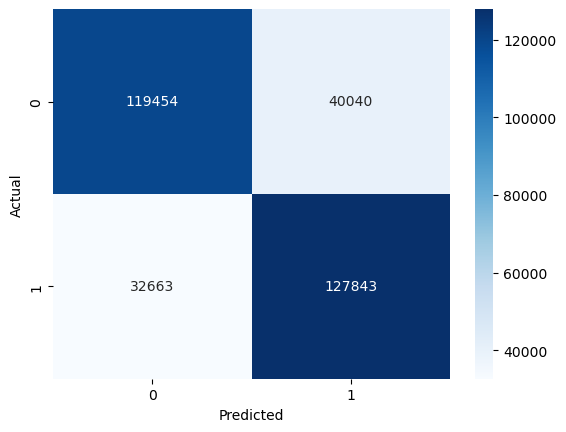

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score

# Ajout de l'AUC-ROC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("AUC-ROC:", roc_auc)


AUC-ROC: 0.8535218623563886


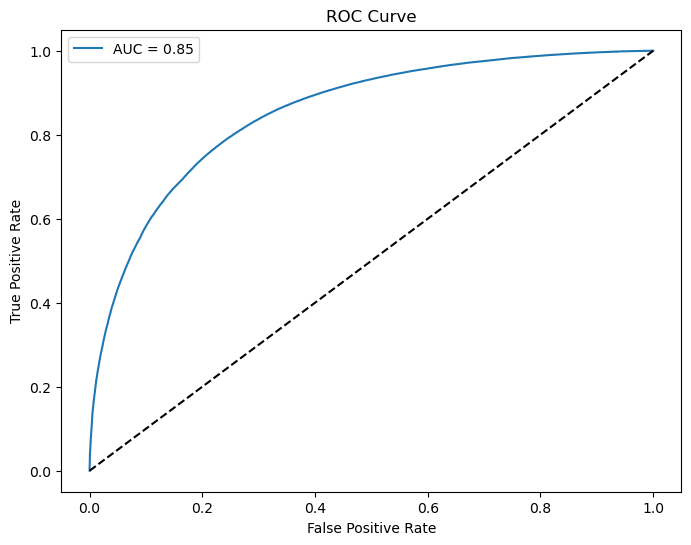

In [55]:
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve

# Tracer la courbe ROC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [56]:
# Interprétation des coefficients et odds ratios
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]
odds_ratios = np.exp(coefficients)

In [57]:

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds Ratio': odds_ratios
})

In [58]:

# Trier par coefficient (ordre décroissant)
sorted_results = results_df.sort_values(by='Coefficient', ascending=False)

In [59]:
# Afficher les 10 mots les plus importants pour chaque classe
print("Top 10 des mots associés à un sentiment positif:")
print(sorted_results.head(10))

Top 10 des mots associés à un sentiment positif:
              Feature  Coefficient  Odds Ratio
3921            smile     4.899035  134.160309
4327            thank     4.327494   75.754216
889   congratulations     4.245582   69.796400
3369            proud     4.145059   63.121336
4708             wait     3.995633   54.360265
4777          welcome     3.945176   51.685430
888          congrats     3.827130   45.930537
4330           thanks     3.815382   45.394079
4387              thx     3.546313   34.685205
3924          smiling     3.463523   31.929268


In [60]:
print("\nTop 10 des mots associés à un sentiment négatif:")
print(sorted_results.tail(10))


Top 10 des mots associés à un sentiment négatif:
            Feature  Coefficient  Odds Ratio
1172   disappointed    -5.728187    0.003253
598          bummed    -5.758645    0.003155
2756           miss    -5.809430    0.002999
3587            rip    -5.956921    0.002588
1152           died    -6.059894    0.002335
2109          hurts    -6.185727    0.002059
3265           poor    -6.252141    0.001926
4605  unfortunately    -6.644256    0.001301
3652          sadly    -7.064816    0.000855
3650            sad    -9.567591    0.000070


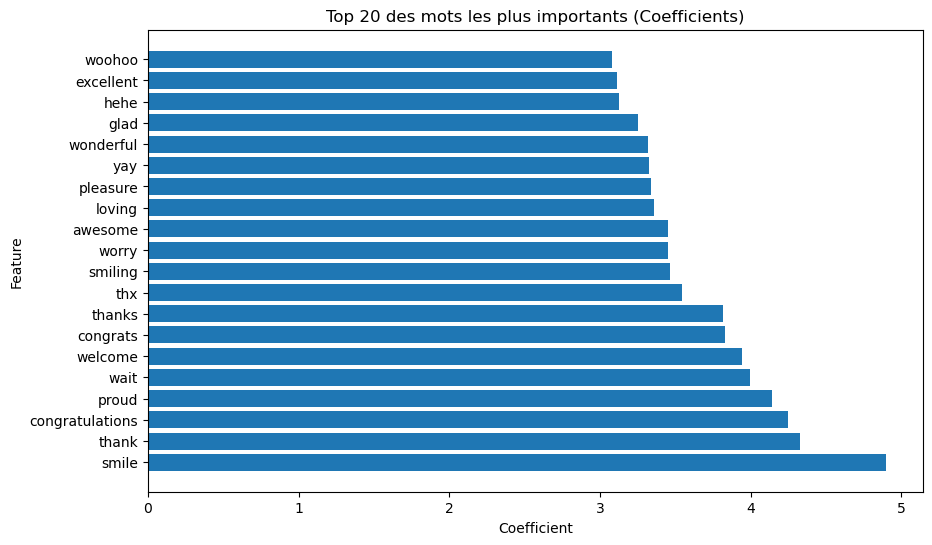

In [61]:
# Visualisation des coefficients
plt.figure(figsize=(10, 6))
plt.barh(sorted_results['Feature'].head(20), sorted_results['Coefficient'].head(20))
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 des mots les plus importants (Coefficients)')
plt.show()

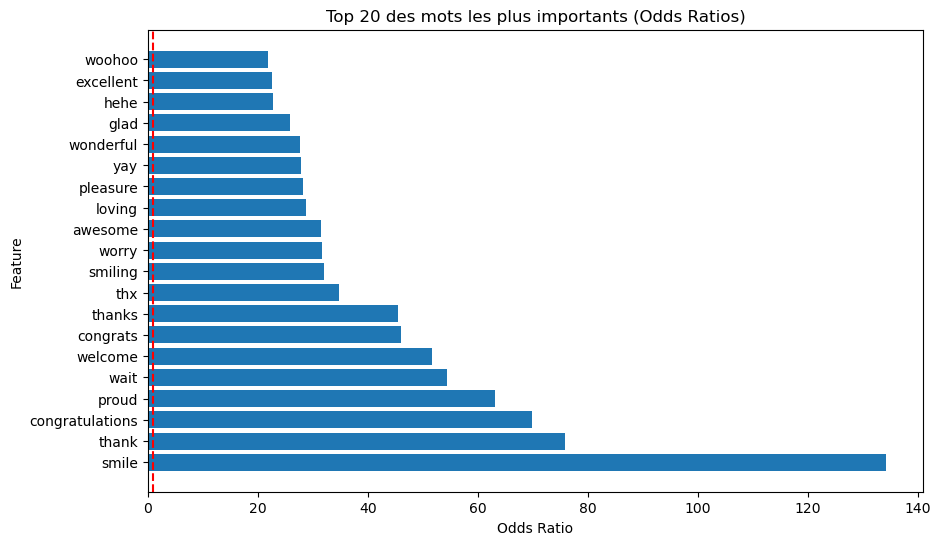

In [62]:
# Visualisation des odds ratios
plt.figure(figsize=(10, 6))
plt.barh(sorted_results['Feature'].head(20), sorted_results['Odds Ratio'].head(20))
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Top 20 des mots les plus importants (Odds Ratios)')
plt.axvline(x=1, color='red', linestyle='--')  # Ligne de référence pour OR = 1
plt.show()